<a href="https://colab.research.google.com/github/huytuan3108/bai_tap_fuzzy/blob/main/b2_of_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


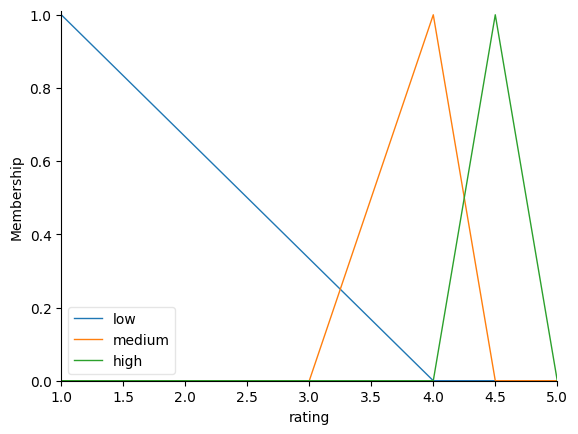

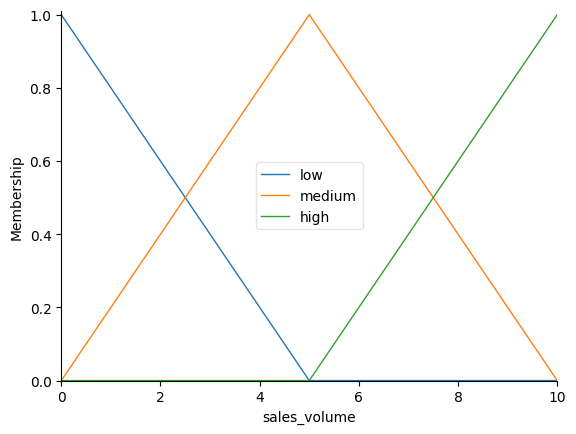

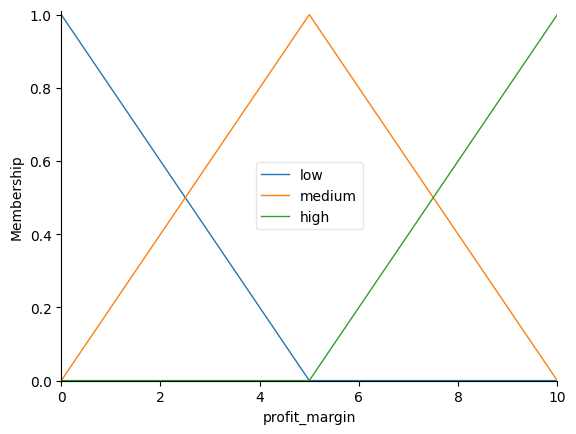

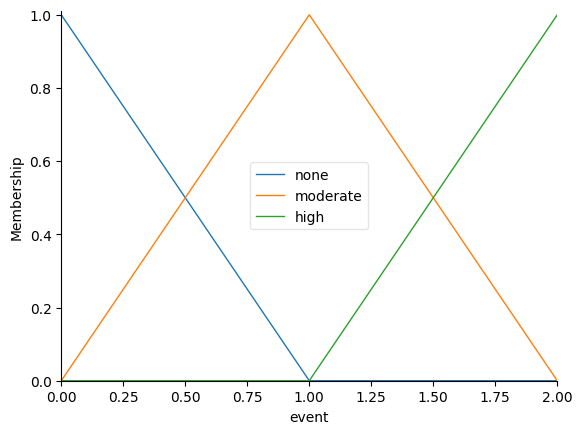

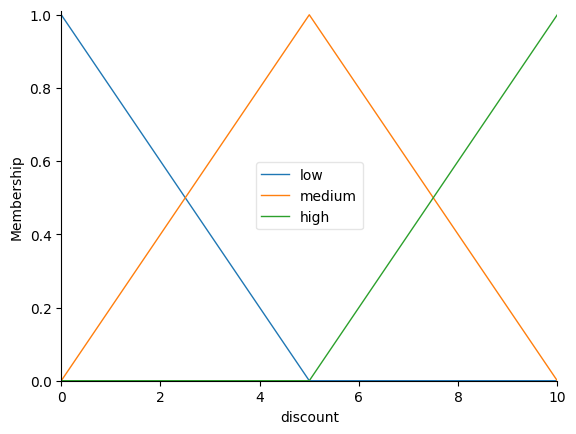

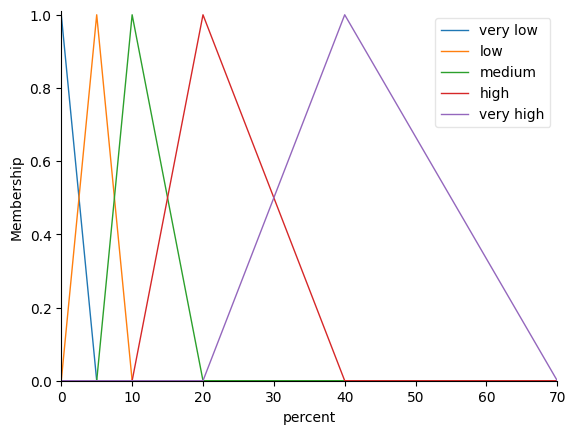

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rating=ctrl.Antecedent(np.arange(1,5.1,0.1), 'rating')
sales_volume=ctrl.Antecedent(np.arange(0,10.2,1),'sales_volume')
profit_margin=ctrl.Antecedent(np.arange(0,10.1,1), 'profit_margin')
event=ctrl.Antecedent(np.arange(0,2.1,1), 'event')
discount=ctrl.Antecedent(np.arange(0,10.1,1), 'discount')
percent=ctrl.Consequent(np.arange(0,70.1,1), 'percent')
rating['low']=fuzz.trimf(rating.universe, [1,1,4])
rating['medium']=fuzz.trimf(rating.universe, [3,4,4.5])
rating['high']=fuzz.trimf(rating.universe, [4,4.5,5])
rating.view()
sales_volume['low']=fuzz.trimf(sales_volume.universe, [0,0,5])
sales_volume['medium']=fuzz.trimf(sales_volume.universe, [0,5,10])
sales_volume['high']=fuzz.trimf(sales_volume.universe, [5,10,10])
sales_volume.view()
profit_margin['low']=fuzz.trimf(profit_margin.universe, [0,0,5])
profit_margin['medium']=fuzz.trimf(profit_margin.universe, [0,5,10])
profit_margin['high']=fuzz.trimf(profit_margin.universe, [5,10,10])
profit_margin.view()
event['none']=fuzz.trimf(event.universe, [0,0,1])
event['moderate']=fuzz.trimf(event.universe, [0,1,2])
event['high']=fuzz.trimf(event.universe, [1,2,2])
event.view()
discount['low']=fuzz.trimf(discount.universe, [0,0,5])
discount['medium']=fuzz.trimf(discount.universe, [0,5,10])
discount['high']=fuzz.trimf(discount.universe, [5,10,10])
discount.view()
percent['very low']=fuzz.trimf(percent.universe, [0,0,5])
percent['low']=fuzz.trimf(percent.universe, [0,5,10])
percent['medium']=fuzz.trimf(percent.universe, [5,10,20])
percent['high']=fuzz.trimf(percent.universe, [10,20,40])
percent['very high']=fuzz.trimf(percent.universe, [20,40,70])
percent.view()

In [ ]:
rule1=ctrl.Rule(rating['high'] | sales_volume['high'] | profit_margin['high'], percent['very low'])
rule2=ctrl.Rule(rating['low'] | sales_volume['low'] | profit_margin['high'], percent['high'])
rule3=ctrl.Rule(event['high'] | discount['high'], percent['very high'])
rule4=ctrl.Rule(rating['medium'] | sales_volume['medium'] | profit_margin['medium'], percent['medium'])
rule5=ctrl.Rule(discount['low'] | sales_volume['high'] | profit_margin['low'], percent['very low'])
rule6=ctrl.Rule(rating['low'] | event['none'], percent['medium'])
rule7=ctrl.Rule(sales_volume['low'] | profit_margin['low'], percent['very high'])

chiết khấu: 32.98692810457514


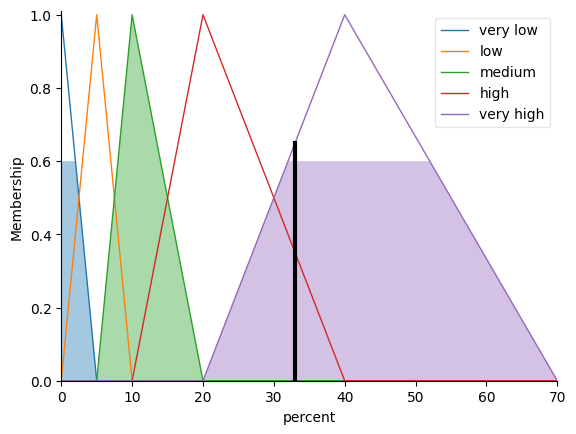

In [ ]:
discount_percentage = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(discount_percentage)
fuzzy_system.input['rating']=4.3
fuzzy_system.input['sales_volume']=5
fuzzy_system.input['profit_margin']=4
fuzzy_system.input['event']=1.5
fuzzy_system.input['discount']=8
fuzzy_system.compute()
print("chiết khấu:", fuzzy_system.output['percent'])
percent.view(sim=fuzzy_system)